In [1]:
# 获取公寓的房源数据
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')
%matplotlib inline

In [3]:
pd.set_option("display.max_columns", 30)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.precision", 3)
CSV_PATH = "apartment_cost_list.csv"
df = pd.read_csv(CSV_PATH)
df

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,NaN,$65000.00,0,NaN,NaN,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AND 2N INCLUDING CAPPING/REMOVING 1 KITCHEN. NO CHA...
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR RENOVATION OF APARTMENT 5D ON THE 5TH FLOOR. PLUMBING...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick building from 9 rooming units and one apartment i...
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,NaN,02/28/2006,$75000.00,0,NaN,NaN,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN EGRESS OR USE.
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex apartment - between basement and 1st floor in exist...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19608,122923649,MANHATTAN,315,WEST 33RD STREET,757,22,1013552,A2,104,NaN,03/21/2017,$60000.00,0,NaN,NaN,0,C6-4,RENOVATION OF APARTMENTS 8N &amp; 12A. ARCHITECTURAL AND PLUMBING WORKS AS PER PLANS. NO CHANGE ...
19609,121090112,MANHATTAN,110,DUANE STREET,150,22,1001645,A2,101,NaN,07/17/2012,$40000.00,0,NaN,NaN,0,C6-2A,"APARTMENT RENVOATION AT APT #4R. DEMOLISH AND CONSTRUCT INTERIOR PARTITIONS, CEILING AND DOORS. ..."
19610,102937342,MANHATTAN,166,BANK STREET,638,4,1078335,A2,102,NaN,02/07/2001,$80000.00,0,NaN,NaN,0,C6-2,Interior renovation of an existing apartment. Partition work. Window replacement. Minor plumbi...
19611,200838558,BRONX,2762,KINGSBRIDGE TERRACE,3253,90,2015521,A2,208,NaN,NaN,$40000.00,0,NaN,NaN,0,R6,"Proposed to renovate existing apartments. No change in use, occupancy, or egress."


In [4]:
df.columns,len(df)

(Index(['Job #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot', 'Bin #',
        'Job Type', 'Community - Board', 'Curb Cut', 'Fully Permitted',
        'Initial Cost', 'Proposed Zoning Sqft', 'Horizontal Enlrgmt',
        'Vertical Enlrgmt', 'Enlargement SQ Footage', 'Zoning Dist1',
        'Job Description'],
       dtype='object'),
 19613)

In [5]:
df["Borough"]

0        MANHATTAN
1        MANHATTAN
2         BROOKLYN
3         BROOKLYN
4         BROOKLYN
           ...    
19608    MANHATTAN
19609    MANHATTAN
19610    MANHATTAN
19611        BRONX
19612     BROOKLYN
Name: Borough, Length: 19613, dtype: object

In [6]:
sudf = df[["Borough", "Job Type", "Initial Cost"]]
sudf

,Borough,Job Type,Initial Cost
0,MANHATTAN,A2,$65000.00
1,MANHATTAN,A2,$85000.00
2,BROOKLYN,A1,$60000.00
3,BROOKLYN,A2,$75000.00
4,BROOKLYN,A1,$40000.00
...,...,...,...
19608,MANHATTAN,A2,$60000.00
19609,MANHATTAN,A2,$40000.00
19610,MANHATTAN,A2,$80000.00
19611,BRONX,A2,$40000.00


In [7]:
sudf.describe()

,Borough,Job Type,Initial Cost
count,19613,19613,19613
unique,5,3,46
top,MANHATTAN,A2,$40000.00
freq,15341,18126,2877


In [8]:
sudf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19613 entries, 0 to 19612
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Borough       19613 non-null  object
 1   Job Type      19613 non-null  object
 2   Initial Cost  19613 non-null  object
dtypes: object(3)
memory usage: 459.8+ KB


In [9]:
sudf["Initial Cost"] = sudf["Initial Cost"].map(lambda x: x.strip("$"))
sudf

C:\Users\CUP\AppData\Local\Temp\ipykernel_15424\3240068869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sudf["Initial Cost"] = sudf["Initial Cost"].map(lambda x: x.strip("$"))


,Borough,Job Type,Initial Cost
0,MANHATTAN,A2,65000.00
1,MANHATTAN,A2,85000.00
2,BROOKLYN,A1,60000.00
3,BROOKLYN,A2,75000.00
4,BROOKLYN,A1,40000.00
...,...,...,...
19608,MANHATTAN,A2,60000.00
19609,MANHATTAN,A2,40000.00
19610,MANHATTAN,A2,80000.00
19611,BRONX,A2,40000.00


In [11]:
sudf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19613 entries, 0 to 19612
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       19613 non-null  object 
 1   Job Type      19613 non-null  object 
 2   Initial Cost  19613 non-null  float64
dtypes: float64(1), object(2)
memory usage: 459.8+ KB


In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder_B = LabelEncoder()
B = labelencoder_B.fit_transform(sudf["Borough"])
labelencoder_J = LabelEncoder()
J = labelencoder_J.fit_transform(sudf["Job Type"])
sudf["Borough"] = B
sudf["Job Type"] = J

C:\Users\CUP\AppData\Local\Temp\ipykernel_15424\1518000606.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sudf["Borough"] = B
C:\Users\CUP\AppData\Local\Temp\ipykernel_15424\1518000606.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sudf["Job Type"] = J


In [18]:
sudf

,Borough,Job Type,Initial Cost
0,2,1,65000.0
1,2,1,85000.0
2,1,0,60000.0
3,1,1,75000.0
4,1,0,40000.0
...,...,...,...
19608,2,1,60000.0
19609,2,1,40000.0
19610,2,1,80000.0
19611,0,1,40000.0


In [19]:
sudf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19613 entries, 0 to 19612
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       19613 non-null  int32  
 1   Job Type      19613 non-null  int32  
 2   Initial Cost  19613 non-null  float64
dtypes: float64(1), int32(2)
memory usage: 306.6 KB


In [20]:
sudf.describe()

,Borough,Job Type,Initial Cost
count,19613.000,19613.000,19613.000
mean,1.843,0.931,59442.156
std,0.537,0.266,26687.304
min,0.000,0.000,40000.000
25%,2.000,1.000,45000.000
50%,2.000,1.000,57000.000
75%,2.000,1.000,70000.000
max,4.000,2.000,490000.000


In [23]:
sudf.pivot_table('Borough','Job Type', aggfunc="mean")

,Borough
Job Type,
0,1.674
1,1.856
2,1.873


In [29]:
sudf

,Borough,Job Type,Initial Cost
0,2,1,65000.0
1,2,1,85000.0
2,1,0,60000.0
3,1,1,75000.0
4,1,0,40000.0
...,...,...,...
19608,2,1,60000.0
19609,2,1,40000.0
19610,2,1,80000.0
19611,0,1,40000.0


In [31]:
from sklearn.model_selection import train_test_split
x = sudf[["Borough","Job Type"]]
y = sudf["Initial Cost"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=22)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5, n_estimators=10)
rfc.fit(x_train,y_train)
y_predict = rfc.predict(x_test)

Text(0.5, 1.02, 'New York apartment Cost')

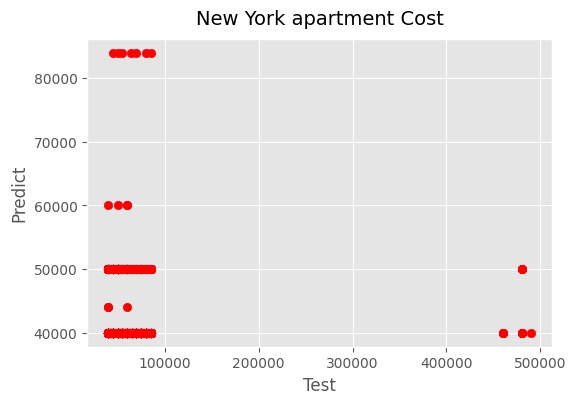

In [33]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(y_test, y_predict, color='r')
ax.set_ylabel('Predict')
ax.set_xlabel('Test')
ax.set_title('New York apartment Cost', fontsize=14,
y=1.02)

In [35]:
# 预测的很失败，数据集不好